# Exercise 2

Neural Netwoks for Health Technology Applications  
22.1.2020, Valentin Dassin  
Helsinki Metropolia University of Applied Sciences

In [1]:
%pylab inline
import pandas as pd
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import preprocessing
filename=r'C:/Users/User/Desktop/Boulot/DUETI/S2/1rst part/neural/processed.cleveland.data'
df = pd.read_csv(filename, 
                 index_col = None, 
                 header=None, 
                 na_values = '?')
#We drop the missing values ---> The others ways are adding a lot of noise
df = df.dropna()
#df = df.fillna(0)
#df = df.fillna(df.mean()) 
#df = df.interpolate()

#We parse the data
data = df.loc[:, 0:12].values
labels = 1.0*(df.loc[:, 13].values > 0)

#By this way, we are slitting the data into two groups:
#The partial group contains the training + validation data
#The test (25% of the data) data is separated to be used once the model is confirmed
train_data = data[:150]
train_labels = labels[:150]

validation_data = data[151:227]
validation_labels = labels[151:227]

test_data = data[227:]
test_labels = labels[227:]

#We normalize the data: help to have muutch better results in fewer epochs and remove a lot of noise
mean = data.mean(axis=0)
data -= mean
std = data.std(axis=0)
data /= std


In [3]:
# Construct the network model

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

network = Sequential()

#This model have 1 layer and 10 neurons (good ratio performances/complexyty and not too long to train)
network.add(Dense(12, activation='relu', input_shape=(13,)))
network.add(Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile the model

network.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])

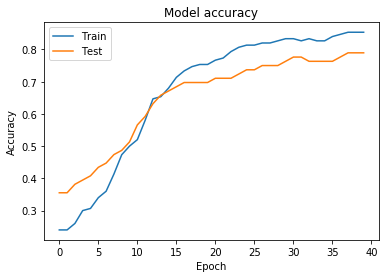

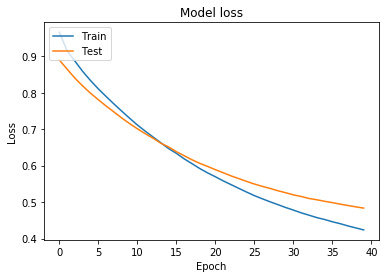

In [5]:
import matplotlib.pyplot as plt

#We train the model with 75% of the data and evaluate it with 25%
#The batch size is an important factor, usually it's quite good arround 32:
#Below 32, performances needs a lot of epochs before to be accaptables
#Above 32, performances are improving quickly but we have big overfaking
#We are plotting the accuracy and the losses depending on the batch size: that allow to see how quikly a model is improving
#The goal is to have good performances without having to set a big batch size

#history = network.fit(train_data, train_labels, validation_split=0.25, epochs=30, batch_size=35,verbose=0)
history = network.fit(train_data, train_labels,
                    epochs=40, batch_size=45, verbose=0,
                    validation_data = (validation_data, validation_labels))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

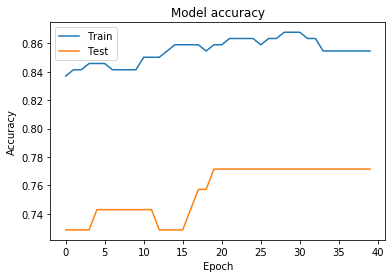

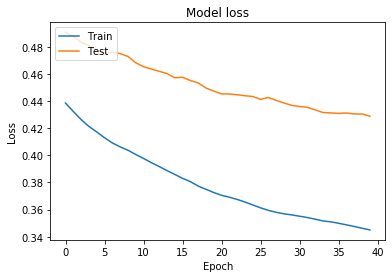

In [6]:
history = network.fit(data[:227], labels[:227],
                    epochs=40, batch_size=55, verbose=0,
                    validation_data = (test_data, test_labels))
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()